<a href="https://colab.research.google.com/github/ranisyafrila28/ai/blob/main/Copy_of_Computer_Vision_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengambil dataset dari github
!git clone https://github.com/khoiruuuls/dataset-metal-defect-detection.git

Cloning into 'dataset-metal-defect-detection'...
remote: Enumerating objects: 8598, done.
remote: Total 8598 (delta 0), reused 0 (delta 0), pack-reused 8598
Receiving objects: 100% (8598/8598), 97.84 MiB | 33.83 MiB/s, done.
Updating files: 100% (8648/8648), done.


In [ ]:
import cv2
import os

# Tentukan direktori tempat dataset Anda disimpan
defect_directory = '/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front'
ok_directory = '/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/ok_front'

# Inisialisasi dua daftar kosong untuk gambar dan label
images = []
labels = []

# Fungsi untuk membaca dan memproses gambar dari direktori
def read_images_from_directory(directory, label):
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
            labels.append(label)

# Baca gambar dari direktori "def_front" dengan label "defect"
read_images_from_directory(defect_directory, label="defect")

# Baca gambar dari direktori "ok_front" dengan label "ok"
read_images_from_directory(ok_directory, label="ok")

# Sekarang, Anda memiliki daftar gambar (images) dan label (labels) dalam Python.


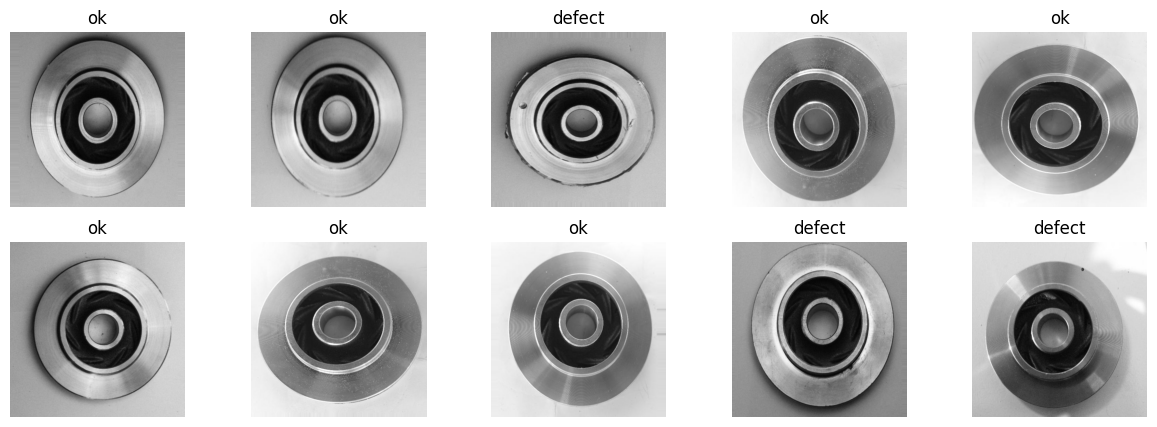

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Menyatukan gambar dan label ke dalam satu daftar
image_label_pairs = list(zip(images, labels))

# Mengacak urutan gambar dan label
random.shuffle(image_label_pairs)

# Menentukan jumlah baris dan kolom sesuai jumlah gambar yang akan ditampilkan
num_rows = 2
num_cols = 5

# Menampilkan gambar dengan label "defect"
plt.figure(figsize=(15, 5))
for i, (img, label) in enumerate(image_label_pairs):
    if label == "defect":
        plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("defect")
        plt.axis("off")
    if i >= (num_rows * num_cols - 1):
        break

# Menampilkan gambar dengan label "ok"
for i, (img, label) in enumerate(image_label_pairs):
    if label == "ok":
        plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("ok")
        plt.axis("off")
    if i >= (2 * num_rows * num_cols - 1):
        break

plt.show()

In [2]:
import cv2
import imutils
import numpy as np

# Fungsi untuk mengaplikasikan augmentasi pada gambar
def augment_image(image):
    augmented_images = []

    # Mirror (flipping) horizontal
    flipped = cv2.flip(image, 1)
    augmented_images.append(("flipped", flipped))

    # Rotasi
    for angle in [45, 90, 135]:
        rotated = imutils.rotate(image, angle)
        augmented_images.append(("rotated_{}".format(angle), rotated))

    # Brightness (Kecerahan)
    for gamma in [0.5, 1.5]:
        adjusted = np.power(image / 255.0, gamma) * 255
        augmented_images.append(("brightness_{}".format(gamma), adjusted.astype("uint8")))

    return augmented_images

# Fungsi untuk menambahkan gambar dan label ke dataset
def add_augmented_data(images, labels, augmented_images, label):
    for augmented_image in augmented_images:
        images.append(augmented_image[1])
        labels.append(label)

# Inisialisasi daftar kosong untuk gambar dan label augmented
augmented_images = []
augmented_labels = []

# Augmentasi data untuk label "defect"
for i, (img, label) in enumerate(image_label_pairs):
    if label == "defect":
        augmented = augment_image(img)
        add_augmented_data(augmented_images, augmented_labels, augmented, "defect")

# Augmentasi data untuk label "ok"
for i, (img, label) in enumerate(image_label_pairs):
    if label == "ok":
        augmented = augment_image(img)
        add_augmented_data(augmented_images, augmented_labels, augmented, "ok")

# Gabungkan gambar dan label augmented dengan gambar dan label asli
augmented_images += images
augmented_labels += labels

# Sekarang, Anda memiliki dataset yang sudah di-augmentasi.


NameError: ignored

In [ ]:
import numpy as np


# Jumlah data total
total_samples = len(images)  # images adalah daftar gambar Anda

# Persentase pembagian (misalnya, 70% pelatihan, 15% validasi, 15% pengujian)
train_percent = 0.70
validation_percent = 0.15
test_percent = 0.15

# Hitung jumlah sampel untuk setiap bagian
num_train_samples = int(total_samples * train_percent)
num_validation_samples = int(total_samples * validation_percent)
num_test_samples = total_samples - num_train_samples - num_validation_samples

# Buat indeks acak untuk membagi data
indices = np.random.permutation(total_samples)

# Bagi dataset menjadi tiga bagian
train_images = [images[i] for i in indices[:num_train_samples]]
train_labels = [labels[i] for i in indices[:num_train_samples]]

validation_images = [images[i] for i in indices[num_train_samples:num_train_samples + num_validation_samples]]
validation_labels = [labels[i] for i in indices[num_train_samples:num_train_samples + num_validation_samples]]

test_images = [images[i] for i in indices[num_train_samples + num_validation_samples:]]
test_labels = [labels[i] for i in indices[num_train_samples + num_validation_samples:]]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

# Konversi daftar gambar dan label menjadi array NumPy
x_train = np.array(train_images)
y_train = np.array(train_labels)

x_validation = np.array(validation_images)
y_validation = np.array(validation_labels)

x_test = np.array(test_images)
y_test = np.array(test_labels)

# Konversi label-label teks menjadi bilangan bulat
y_train = [0 if label == 'ok' else 1 for label in y_train]
y_validation = [0 if label == 'ok' else 1 for label in y_validation]
y_test = [0 if label == 'ok' else 1 for label in y_test]

# Konversi label-label ke tipe data float
y_train = np.array(y_train).astype(float)
y_validation = np.array(y_validation).astype(float)
y_test = np.array(y_test).astype(float)

# Define and compile the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    # Binary classification: defect or not
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_validation, y_validation))

# Save the model
model.save('/content/defect_detection_model.h5')

NameError: ignored

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(x_test)

# Threshold the predictions to get binary results (defect or not)
threshold = 0.5  # You can adjust this threshold
binary_predictions = (predictions > threshold).astype(int)

# Evaluate the binary predictions (you can use various metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

7/7 [==============================] - 21s 3s/step - loss: 0.6673 - accuracy: 0.6888
Test accuracy: 0.6887755393981934
7/7 [==============================] - 21s 3s/step
Accuracy: 0.6887755102040817
Precision: 0.6870748299319728
Recall: 0.8706896551724138
F1 Score: 0.7680608365019012


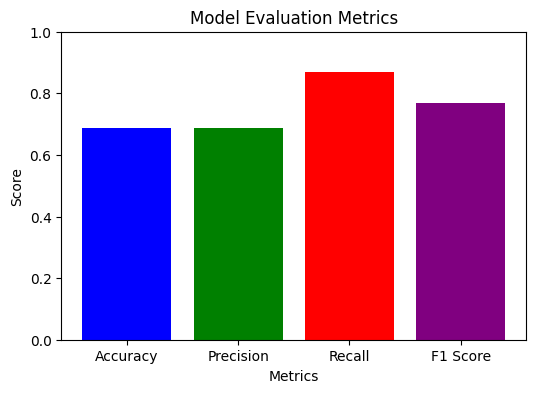

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1.0)  # Set the y-axis limit to the range [0, 1]
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()


1/1 [==============================] - 0s 247ms/step
Hasil: Defect
Probabilitas Defect: 0.5021419525146484
Probabilitas No Defect: 0.49785804748535156


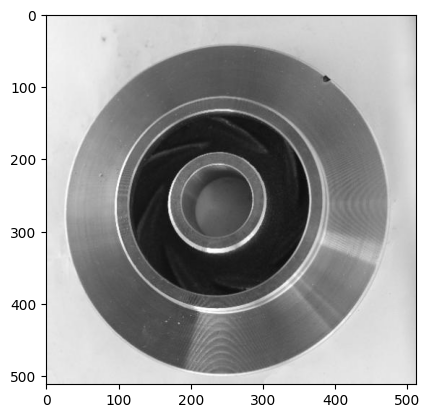

In [ ]:
import cv2
import numpy as np

# Membaca gambar yang akan diuji
# image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front/cast_def_0_2515.jpeg')  # Terbaca Defect
# image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front/cast_def_0_1112.jpeg')  # Terbaca Tidak Defect, Padahal Defect
image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front/cast_def_0_1589.jpeg')  # Terbaca Tidak Defect, Padahal Defect
# image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/ok_front/cast_ok_0_2472.jpeg')  # Hasil Tidak Defect

# Pastikan ukuran gambar sesuai dengan model Anda (512x512)
image = cv2.resize(image, (512, 512))

# Ubah gambar ke format yang sesuai (misalnya, float32)
image = image.astype(np.float32) / 255.0

# Lakukan prediksi menggunakan model
prediction = model.predict(np.expand_dims(image, axis=0))[0]

# Ambil probabilitas hasil positif (defect)
defect_probability = prediction[0]

# Ambil probabilitas hasil negatif (tidak defect)
no_defect_probability = 1.0 - defect_probability

# Menentukan threshold untuk mengklasifikasikan hasil
threshold = 0.5  # Anda dapat menyesuaikan threshold sesuai kebutuhan

if defect_probability >= threshold:
    result = "Defect"
else:
    result = "No Defect"

# Menampilkan data hasil
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(f"Hasil: {result}")
print(f"Probabilitas Defect: {defect_probability}")
print(f"Probabilitas No Defect: {no_defect_probability}")


<IPython.core.display.Javascript object>

Saved to photo.jpg


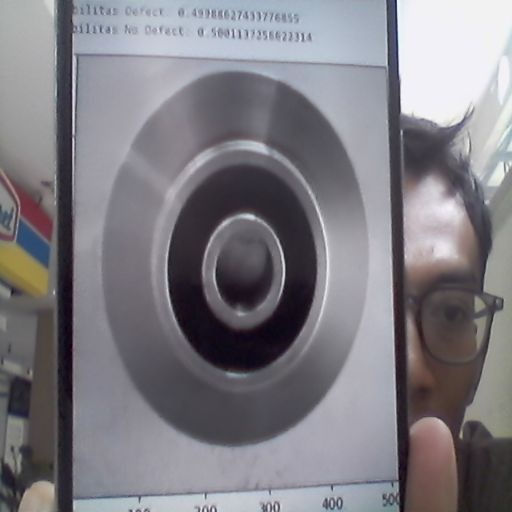

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 512;
      canvas.height = 512;

      const ctx = canvas.getContext('2d');
      ctx.drawImage(video, 0, 0, 512, 512);

      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # resize the image to 512x512
  img = cv2.resize(img, (512, 512))
  # save the resized image
  cv2.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


1/1 [==============================] - 0s 157ms/step
Hasil: Defect
Probabilitas Defect: 0.5011307001113892
Probabilitas No Defect: 0.49886929988861084


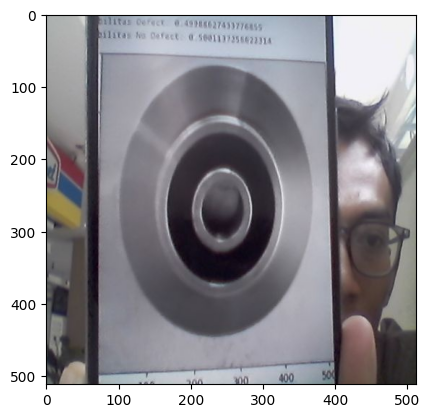

In [ ]:
import cv2
import numpy as np

# Membaca gambar yang akan diuji
image = cv2.imread('/content/photo.jpg')  # Ganti dengan path gambar Anda

# Memastikan ukuran gambar sama dengan model
image = cv2.resize(image, (512, 512))

# Ubah gambar ke format yang sesuai (misalnya, float32)
image = image.astype(np.float32) / 255.0

# Lakukan prediksi menggunakan model
prediction = model.predict(np.expand_dims(image, axis=0))[0]

# Ambil probabilitas hasil positif (defect)
defect_probability = prediction[0]

# Ambil probabilitas hasil negatif (tidak defect)
no_defect_probability = 1.0 - defect_probability

# Menentukan threshold untuk mengklasifikasikan hasil
threshold = 0.5  # Anda dapat menyesuaikan threshold sesuai kebutuhan

if defect_probability >= threshold:
    result = "Defect"
else:
    result = "No Defect"

# Menampilkan data hasil
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(f"Hasil: {result}")
print(f"Probabilitas Defect: {defect_probability}")
print(f"Probabilitas No Defect: {no_defect_probability}")
